In [1]:
from keras_facenet import FaceNet

from mtcnn.mtcnn import MTCNN

from sklearn.metrics.pairwise import cosine_similarity

from PIL import Image,ImageDraw
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os

In [2]:
embedder = FaceNet()
detector = MTCNN()

In [3]:
def extraction_keras_lock(*file_name,show=None):
  if type(file_name) is tuple:
    file_name = [*file_name,]
  result = []
  for i in file_name:
    image = Image.open(i).convert('RGB')
    im_arr = np.array(image)
    N=0
    faces = detector.detect_faces(im_arr)
    x1,y1,width,height = faces[N]['box'] # faces[N]['box']
    x2,y2 = (x1+width),(y1+height)
    face = im_arr[y1:y2,x1:x2] # ตัดเอาเฉพาะใบหน้า
    image_face = Image.fromarray(face)
    image_face= image_face.resize((128,128))
    if show:
      image_face.show()
    face_img = np.array(image_face).reshape(-1,128,128,3)
    result.append(embedder.embeddings(face_img))

  return result

In [4]:
def visual_multi(path_file):

  nplots = sorted(os.listdir(path_file))
  fig = plt.figure(figsize=(8,4))
  for j in range(len(nplots)):
    # print(path_file+nplots[j])
    img = cv2.resize(cv2.imread(path_file+nplots[j]),(224,224))
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(4,10,j+1)
    plt.imshow(image_rgb)
    plt.title(j)
    plt.xticks([]);plt.yticks([])
  plt.show()

In [5]:
def extraction_keras_all(file_name,show=None): # take embeddings, and position
  position_crop = []
  embedding_faces = []
  position = []
  image = Image.open(file_name).convert('RGB')
  im_arr = np.array(image)
  faces = detector.detect_faces(im_arr,)

  for i in faces:
    x1,y1,width,height = i['box']
    x2,y2 = (x1+width),(y1+height)
    position_crop.append([y1,y2,x1,x2])
    position.append([x1,y1,x2,y2])
    # print(i['box'])

  index_image = 0
  for i in position_crop:
    face = im_arr[i[0]:i[1],i[2]:i[3]]
    image_face = Image.fromarray(face)
    image_face = image_face.resize((224,224))
    faces_crops = np.array(image_face).reshape(-1,224,224,3)
    embedding_faces.append(embedder.embeddings(faces_crops))
    index_image+=1
    path = r'C:\Users\Raum\Desktop\jec\code\image_lock\lock_face_{}.jpg'.format(index_image) # path for collect images
    image_face.save(path)
    
    if show:
      image_face.show()
  visual_multi(r'C:\Users\Raum\Desktop\jec\code\image_lock\\')
  

  return embedding_faces,position

In [29]:
f = r'C:\Users\Raum\Desktop\jec\code\dataface\avenger.jpg'
t = r'C:\Users\Raum\Desktop\jec\code\dataface\thor.jpg'
m = r'C:\Users\Raum\Desktop\jec\code\dataface\dogmeme.png'
# embedding_faces,position=extraction_keras_all(f) # lock by self-image
lock_face = extraction_keras_lock(t) # lock by another image
# img,va = plot_result(f,m,[2,3,5],embedding_faces,position)
# img,va = plot_result(f,m,lock_face,embedding_faces,position)

1/1 [==============================] - 0s 61ms/step


In [13]:
# lock_face[0]

In [36]:
# img,va = plot_result(f,m,[0,6,8],embedding_faces,position)

img,va = plot_result(f,m,lock_face,embedding_faces,position,False)
img.show()
# plot_box(f,position)

heloo
heloo
heloo
heloo
heloo
heloo
heloo
heloo
heloo


1/1 [==============================] - 0s 61ms/step


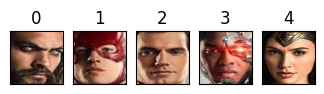

In [73]:
f = r'C:\Users\Raum\Desktop\jec\code\dataface\superman4.jpg'
m = r'C:\Users\Raum\Desktop\jec\code\dataface\memewoman.png'
embedding_faces,position=extraction_keras_all(f) # lock by self-image

In [74]:
img,va = plot_result(f,m,[0,2],embedding_faces,position)
img.show()

In [88]:
f = r'C:\Users\Raum\Desktop\jec\code\dataface\superman4.jpg'
t = r'C:\Users\Raum\Desktop\jec\code\dataface\superman1.jpg',r'C:\Users\Raum\Desktop\jec\code\dataface\wonder.jpg'
m = r'C:\Users\Raum\Desktop\jec\code\dataface\dogmeme.png'
embedding_faces,position=extraction_keras2(f)
lock_face =extraction_keras(*t)
img,va = plot_result(f,m,lock_face,embedding_faces,position)

1/1 [==============================] - 0s 63ms/step


In [83]:
img.show()
# plot_box(f,position)

In [9]:
i = r'C:\Users\Raum\Desktop\jec\code\dataface\pitha.jpg'
t = r'C:\Users\Raum\Desktop\jec\code\dataface\Pita.jpg',r'C:\Users\Raum\Desktop\jec\code\dataface\siri.jpg',r'C:\Users\Raum\Desktop\jec\code\dataface\chai.jpg'
f = r'C:\Users\Raum\Desktop\jec\code\dataface\memeface.png'
embedding_faces,position=extraction_keras2(i)
lock_face =extraction_keras(*t)
img,va = plot_result(i,f,lock_face,embedding_faces,position)

1/1 [==============================] - 0s 65ms/step


In [10]:
img.show()
plot_box(i,position)

In [6]:
i = r'C:\Users\Raum\Desktop\jec\code\videos\frame_199.jpg'
t = r'C:\Users\Raum\Desktop\jec\code\dataface\lock_f2.png'
f = r'C:\Users\Raum\Desktop\jec\code\dataface\memeface.png'
embedding_faces,position=extraction_keras2(i)
lock_face =extraction_keras(t)
img,va = plot_result(i,f,lock_face,embedding_faces,position)
img.show()
plot_box(f,position)

1/1 [==============================] - 0s 58ms/step
